# Data Scientist's Handbook - III

## Bayesian Machine Learning using PyMC3

Previously in the "Data Scientist's Handbook - II" notebook we performed a non-Bayesian regression using Scikit-learn's regression models.

In this notebook, we will perform Bayesian regression by using the PyMC3 Python package.

PyMC3 is a tool for Bayesian statistical modeling and probabilistic machine learning which focuses on advanced Markov chain Monte Carlo (MCMC) and variational fitting algorithms.

PyMC3 implements non-gradient-based and gradient-based MCMC algorithms for Bayesian inference.

For a detail analysis of MCMC algorithms via PyMC3, please refer to the notebook "Bayesian Learning - MCMC I - Linear Regression".

In this notebook, we will skip theoretical discusson on MCMC algorithms. We will treat PyMC3 as a black box for doing Bayesian regression.


First, in the following 5 blocks, we briefly go through only the essential steps to create an effective set of features, train & test data, evaluation metrics and non-Bayesian Linear Regression.



## Create an Effective Feature Set

In [184]:
import pandas as pd

df = pd.read_csv('/Users/hasan/datasets/DataScienceRepository/student-mat.csv')


# Data cleaning: Drop the Missing Target Values
df = df[~df['G3'].isin([0, 1])]

# Rename the target column
df = df.rename(columns={'G3': 'Grade'})

#********************************************************************************

## Generate an effective feature set

# Drop the redundant features
df = df.drop(columns=['school', 'G1', 'G2'])

# Combine the categorical features (via One-Hot Encoding) with the numeric features
df = pd.get_dummies(df)

# Find correlations with the Grade
most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:8]


print("Most Correlated Features\n")
print(most_correlated)

# Edit the DataFrame to Contain Only the Most Correlated Features¶
df = df.ix[:, most_correlated.index]
df = df.drop(columns = 'schoolsup_no') # This feature has the same correlation as schoolsup_yes

#********************************************************************************
## Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

# It contains all attributes (features and the target)
allData = df

y = df['Grade'] # 1D targer vector
X = df.drop(columns='Grade')  # Data Matrix containing all features excluding the label


Most Correlated Features

Grade            1.000000
failures         0.293831
schoolsup_yes    0.238365
schoolsup_no     0.238365
absences         0.213129
Medu             0.190308
Walc             0.190054
goout            0.177383
Name: Grade, dtype: float64


/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


## Create Training and Testing Data Set

To test the performance of the ML model (Linear Regression), we need to set aside some data (e.g., 20%) for testing.

To split the data into training and testing set, we will use Scikit-learn's train_test_split() function.

In [185]:
# Create a Separate Test Set Data

from sklearn.model_selection import train_test_split

# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## Establish Benchmarks Metrics

To evaluate the performance of this regression task, we will use two standard metrics:

- Mean Absolute Error (MAE): Average of the absolute value of the difference between predictions and the true values
- Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and the true values.
The mean absolute error is more interpretable, but the root mean squared error penalizes larger errors more heavily. Either one may be appropriate depending on the situation.

In [186]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

## Non-Bayesian Linear Regression using Scikit-learn

In [187]:
import numpy as np

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
#     X_train = X_train.drop(columns='Grade')
#     X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

results = evaluate(X_train, X_test, y_train, y_test)

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:60: DeprecationWarning

## Visual Comparison of Models

After generating various models, we need to compare their performance.

We perform both visual and textual comparison.

                           mae     rmse
Linear Regression      2.10332  2.64849
ElasticNet Regression  2.45073  2.95719
Random Forest          2.40153  3.01793
Extra Trees            2.74144  3.46675
SVM                    2.32607  2.85958
Gradient Boosted       2.24808  2.76326
Baseline               2.54167   3.1336


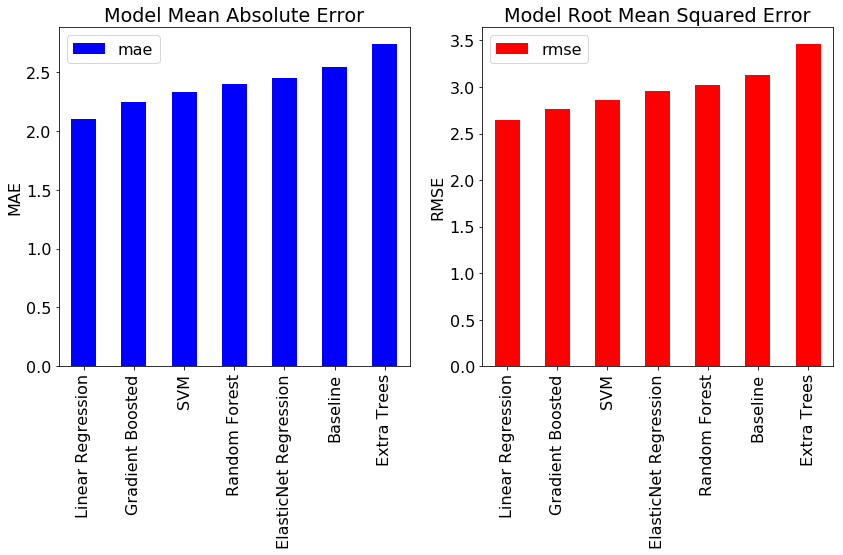

In [188]:
%matplotlib inline
from IPython.core.pylabtools import figsize

import matplotlib.pyplot as plt
import matplotlib

figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

print(results)

## Analysis of the Comparison

Observe that both the MAE and the RMSE values from the Linear Rgression model are the smallest as compared to other regression models.

Hence, we conclude that Linear Regression is so far the best model for predicting student grades for the given data set.

### But how confident are we about the predictions?

To have a quantative understanding of our confidence on the model, it is important to investigate the uncertainty of the feature weights. 

### Why do we care about measuaring uncertainty of the feature weights?

Recall that in a typical Linear Regression problem, the target is predicted by a linear combination of the features. For example, the grades (target variable y) are assumed to be some linear combination of the features x (e.g., evaluation scores and relevant student data). Let's say that there are d such features. Then, the target is given by:

y = intercept + w1*x1 + w2*x2 + ... + wd*xd 

A Linear Regression model finds appropriate vaules for the intercept and the weight value w's for each feature to make correct predictions. The intercept and the weight w's are called the parameters of the model.

In the current problem, we estimated the weights for 6 features and the intercept to predict the grades:

y(predicted) = intercept + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 

Where,
- x1 = failures
- x2 = schoolsup_yes
- x3 = absences
- x4 = Medu
- x5 = Walc
- x6 = goout

Our Linear Regression model computed the point estimates for these weights and the intercept. However, these values are mean estimates. There could be uncertainty (variance) around these estimates. Unfortunately the Linear Regression model that we used don't capture this uncertainty.

So, we are not sure whether a particulr weight is trustworthy or not. For example, if a weight has a large variance, then we won't have much trust on it. In other words, then, the associated feature might not be useful to explain the variance in the target.

Therefore, we need to estimate the uncertainty of the feature weights to better understand the predictive power of our model.

This is done below by using Bayesian analysis.


## 1. Bayesian Analysis

In Bayesian analysis we don't consider each weight as a point estimate. Instead we consider that the weight values are distributed according to Gaussian (Normal) distribution.

The Bayesian approach learns the distribution of the Gaussians for each weight and the intercept.

These Gaussians are characterized by two parameters: mean and variance

For using in the prediction formula, we take the mean values for each weight (from their distributions), as follows:

y(predicted) = intercept + w1(mean)*x1 + w2(mean)*x2 + w3(mean)*x3 + w4(mean)*x4 + w5(mean)*x5 + w6(mean)*x6 

The important thing to note is that we also look at the variance (uncertainty) of the weight distributions. If a weight distribution has a large variance, then we don't trust its mean much.

### What should you expect to see from the Bayesian Regression?

The Bayesian Regression technique should generate Gaussian distributions for the 6 weights and the intercept.

You should carefully examine the variance of each distribution.

As mentioned in the beginning, we will perform Bayesian regression by using the PyMC3 Python package.


### How does PyMC3 generate the distributions of the weights?

It uses Bayes' rule to give the posterior distribution of the weights:

p(w | X, y) =  [p(X, y | w)*p(w)]/Z

Here Z is a constant.

The above formula describes that the probability density of w given the data set (X, y) is proportional to the product of the likelihood of the data p(X, y | w) and the prior probability of w, i.e., p(w).

The normalization constant Z is ignored (it is intractable in high-dimensional data).

Instead of directly solving the above equation to get the posterior distribution for w, we draw samples from this posterior.

The MCMC sampling algorithm is used to do this.

PyMC3 provides the well-known MCMC algorithms to generate samples from the posterior distribution of the feature weights.

### What do I need to know to use PyMC3 sampling algorithm?

You need to do the following 4 things.

- a) Specify the model
- b) Specify the formula
- c) Specify the Prior
- d) Specify the MCMC sampling algorithm



## 1(a). Model Specifications in PyMC3

The first thing that we have to do is to specify the model that we plan to use. For example, Linear Regression is done by Generalized Linear Models (GLMs).

GLMs are a class of flexible models that are widely used to estimate regression relationships between a single outcome variable and one or multiple predictors.

Because these models are so common, PyMC3 offers a glm submodule that allows flexible creation of various GLMs with an intuitive R-like syntax.

To setup the glm submodule of PyMC3, we do the following:

- Define the formula for Linear Regression



## 1(b). Formula for Bayesian Linear Regression

In [189]:
# Create a dictionary object containing both the features and the label
# In the dictionary define use distinct variable names to refer to the columns 

print(X_train.columns[0:])

data = dict(failures=X_train[X_train.columns[0]],
            schoolsup_yes=X_train[X_train.columns[1]], 
            absences = X_train[X_train.columns[2]],
            Medu = X_train[X_train.columns[3]],
            Walc = X_train[X_train.columns[4]],
            goout = X_train[X_train.columns[5]],
            y_train=y_train)



# We need to specify the formula for Bayesian Linear Regression (it follows R-like formula syntax)
formula = 'y_train ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[0:]])

print(formula)

Index(['failures', 'schoolsup_yes', 'absences', 'Medu', 'Walc', 'goout'], dtype='object')
y_train ~ failures + schoolsup_yes + absences + Medu + Walc + goout


## 1(c - d). Model Specification with the Formula, Prior & Sampling Algorithm 

Model specifications in PyMC3 are wrapped in a with-statement.


In [190]:

import pymc3 as pm


print('Running on PyMC3 v{}'.format(pm.__version__))

# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model: 
    
    # Following statement does 4 things:
    # 1. We specify that we will use the GLM module to do Linear Regression
    # 2. We use the "from_formula" method of GLM to pass the Linear Regression formula
    # 3. The 2nd argument takes the dictionary "data" variable that contains all features and the target
    # 4. The 3rd argument needs us to specify the type of prior distribution we intend to use
    #    We use Normal distribution as the prior 
    pm.GLM.from_formula(formula, data, family = pm.glm.families.Normal())
    
    # Following statement is used to draw samples from the posterior distribution of the weights
    # It uses the MCMC Sampling method to draw posterior samples 
    # Number of samples is set by the "draws" parameter
    # Number of chains to run is set by the "chains" parameter
    # If the "step" parameter is not set, then the default "NUTS" sampler will be used
    trace = pm.sample(draws = 2000, chains = 2, tune = 1000, njobs=-1)  # it uses the default NUTS algorithm
    
    # The following two sampling algorithms could be used
    # But we prefer to use the NUTS sampler (above), because so far it outperforms the other samplers
    #trace = pm.sample(step = pm.Metropolis(), draws=2000, chains = 2, tune = 1000)
    #trace = pm.sample(step = pm.Slice(), draws=2000, chains = 2, tune = 1000)
    
    

Running on PyMC3 v3.3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd_log__, goout, Walc, Medu, absences, schoolsup_yes, failures, Intercept]
100%|██████████| 3000/3000 [00:10<00:00, 275.50it/s]


## 2. Analyzing the model
Bayesian inference does not give us only one best fitting line (as maximum likelihood does) but rather a whole posterior distribution of likely parameters. 

Below we plot the posterior distribution of our parameters and the individual samples we drew.

- a. Traceplot of All Samples
- b. Summary of Trace
- b. Traceplot with a Vertical Line at the Mean of the Trace

## 2(a). Traceplot of All Samples

<Figure size 504x504 with 0 Axes>

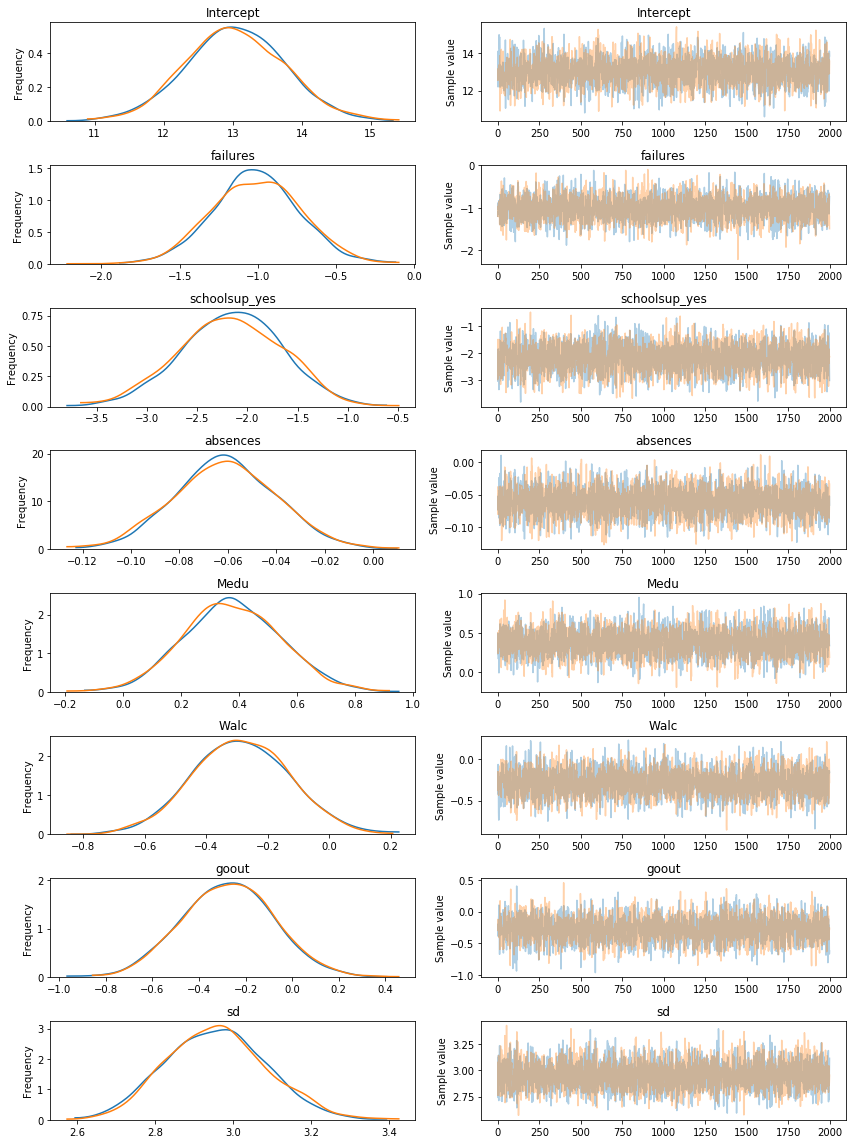

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout();

## Note on Traceplot

Above, the left side of the traceplot is the marginal posterior: the values for the variable are on the x-axis with the probability for the variable (as determined by sampling) on the y-axis. 

The different colored lines indicate that we performed two chains of Markov Chain Monte Carlo. 

From the left side we can see that there is a range of values for each weight. 

The right side shows the different sample values drawn as the sampling process runs.

### What should we look for in the traceplots?

What we care is whether the generated samples converged to a stationay distribution or not. Well, it is difficult to assess. For example, we don't really know how many samples to draw, or how many chains to run, etc.

There are two things that we can do to check the convergence.

- If the sample generation is successful, then we will see that the various colored lines (chains) will mostly overlap (on the left).

- In addition to this, we should check the value of a metric potential scale reduction (EPSR) or R-hat statistic. We get this metric by generating the summary of the trace, as shown below.

## 2(b). Summary of Trace

The potential scale reduction (EPSR) or Rhat statistic compares the variance of a quantity within each chain to its variance across chains.

We should check the last column for the Rhat values.

If the chains have converged to the target posterior distribution, then Rhat should be close to 1.



In [192]:
pm.df_summary(trace)

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: df_summary has been deprecated. In future, use summary instead.
  if __name__ == '__main__':


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,13.027081,0.711347,0.013937,11.655794,14.451959,2642.180017,0.999750
failures,-1.013580,0.277114,0.004470,-1.544981,-0.471914,4038.476410,0.999754
schoolsup_yes,-2.169386,0.502925,0.008056,-3.144883,-1.211342,4040.379401,1.000097
absences,-0.061153,0.020982,0.000293,-0.102866,-0.021285,4748.338601,0.999855
Medu,0.373995,0.165211,0.003139,0.059125,0.697071,3034.608632,1.000006
Walc,-0.288223,0.156822,0.002907,-0.587288,0.027803,2853.944077,0.999776
goout,-0.277630,0.195096,0.003241,-0.655413,0.105173,3132.457538,1.000151
sd,2.955681,0.126875,0.001763,2.720169,3.208088,4883.861569,1.000207


## 2(c). Traceplot with a Vertical Line at the Mean of the Trace

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DeprecationWarning: df_summary has been deprecated. In future, use summary instead.
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: DeprecationWarning: df_summary has been deprecated. In future, use summary instead.


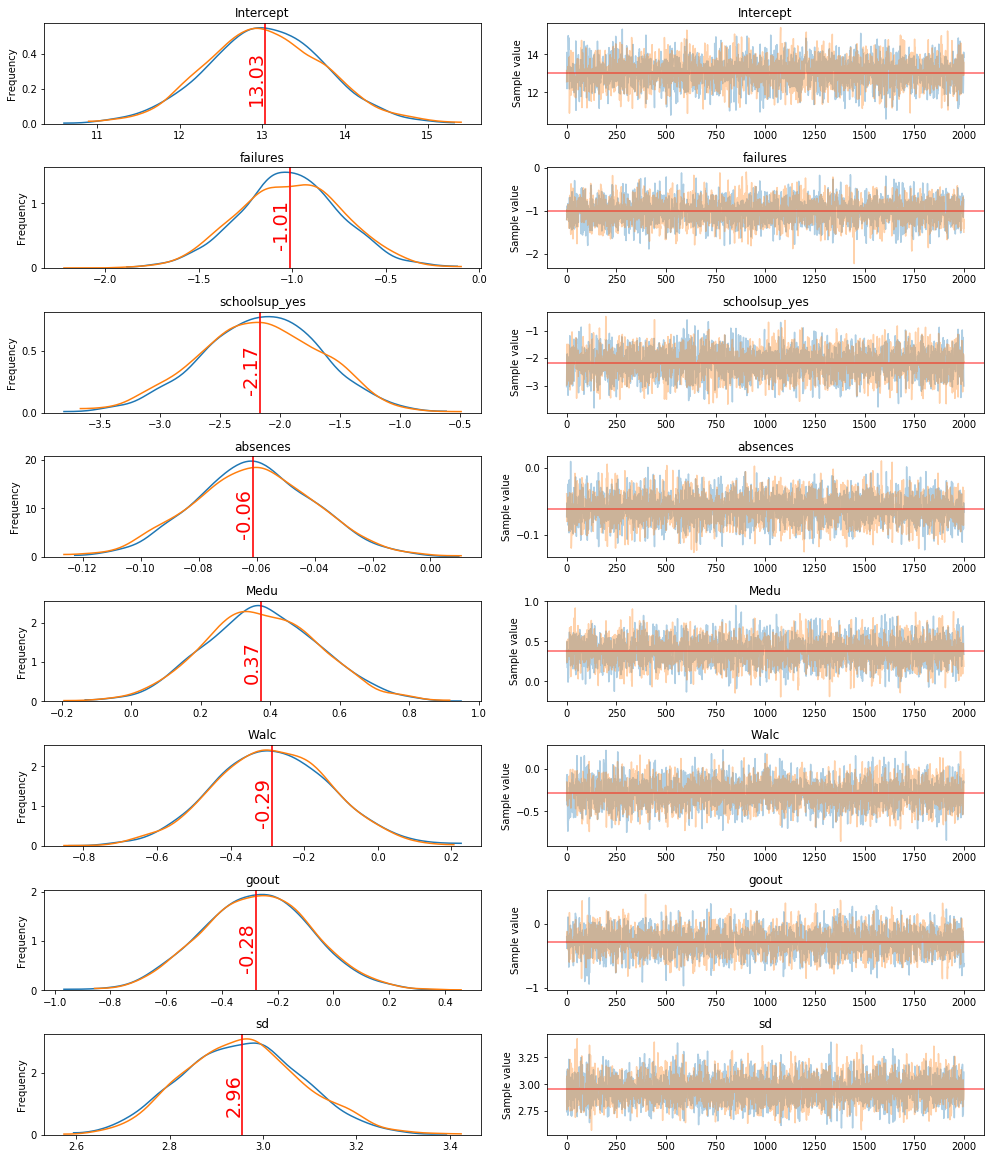

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib

# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')
        

plot_trace(trace);

## 3. Forestplot of All Samples

Another method built into PyMC3 for examinig trace results is the forestplot.

It shows the distribution of each sampled parameter. 

This allows us to see the uncertainty in each sample. 

The forestplot is easily constructed from the trace using pm.forestplot.

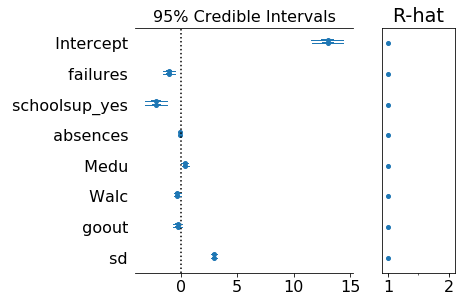

In [194]:
pm.forestplot(trace);

## Note on Forestplot

From the forest plot we can see the most likely value of the parameter (the dot) as well as the 95% credible interval for the parameter. 

The important observation:

The following two features have larger uncertainty compared to the other variables:
- Intercept
- schoolsup_yes 

This can be verified by looking at the variance of their traceplot.


## 4. Histogram of Posterior Distribution

Another built in plotting method in PyMC3 is the posterior distribution of all the model parameters. 

These histograms allow us to see how the model result is a distribution for the parameters rather than a single value.

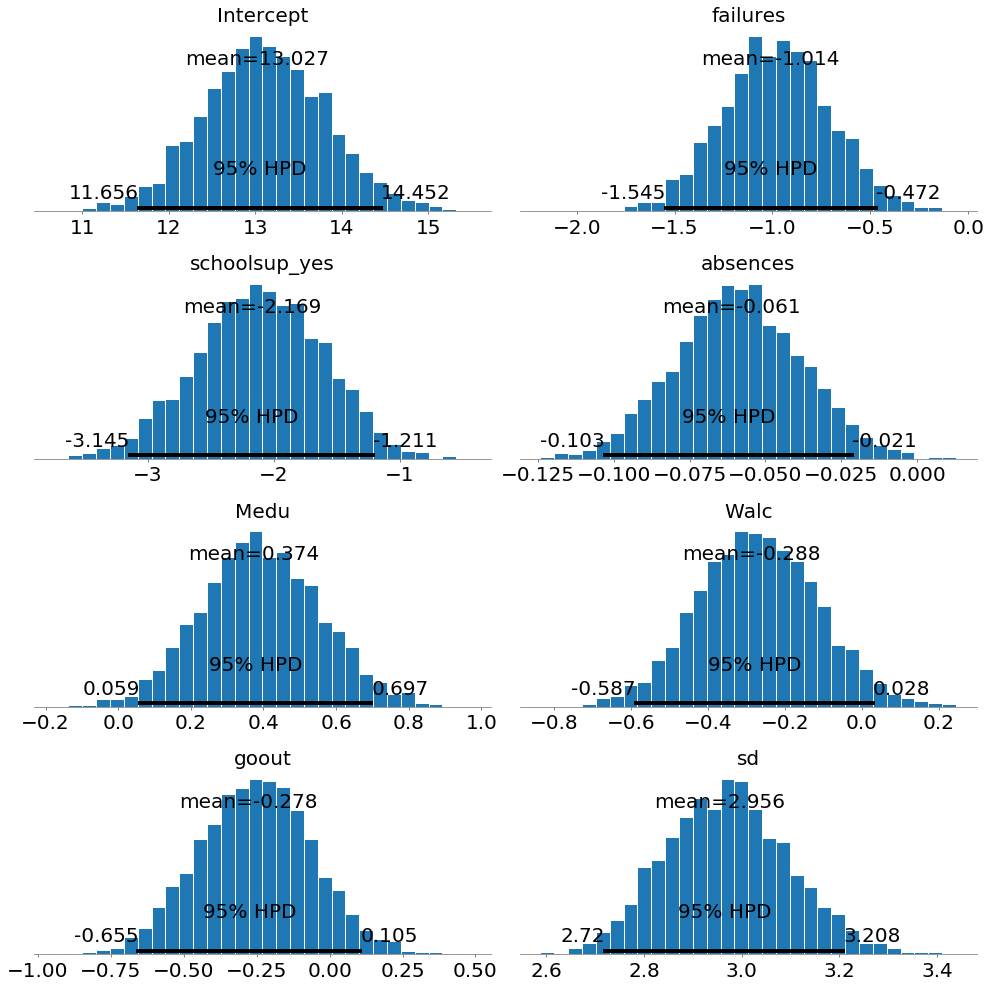

In [195]:
pm.plot_posterior(trace, figsize = (14, 14), text_size=20);

## 5. Compute Mean Variable Weight from the Trace


In [196]:
import numpy as np

for variable in trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, np.mean(trace[variable])))

Variable: Intercept       Mean weight in model: 13.0271
Variable: failures        Mean weight in model: -1.0136
Variable: schoolsup_yes   Mean weight in model: -2.1694
Variable: absences        Mean weight in model: -0.0612
Variable: Medu            Mean weight in model: 0.3740
Variable: Walc            Mean weight in model: -0.2882
Variable: goout           Mean weight in model: -0.2776
Variable: sd_log__        Mean weight in model: 1.0828
Variable: sd              Mean weight in model: 2.9557


## Attribute Information

- failures: number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup: extra educational support (binary: yes or no)
- absences: number of school absences (numeric: from 0 to 93)
- Medu: mothers education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- goout: going out with friends (numeric: from 1 - very low to 5 - very high)

## 6. Interpretations of Weights

Based on the sign and location of the weights, we can make the following inferences regarding the features in our dataset:

- Previous class failures are negatively related to the students final grade
- Extra educational support are negatively related to the students final grade
- The mother's education level is positively related to the students final grade
- Going out with friends is negatively related to the students final grade
- Weekend alcohol consumption is negatively related to the students final grade
- Absences are negatively related to the students final grade

## 7. Evaluate Bayesian Model Using Mean of Model Parameters

In [197]:

# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.ix[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.ix[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.ix['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages

Model  MAE: 2.1931
Model RMSE: 2.6709


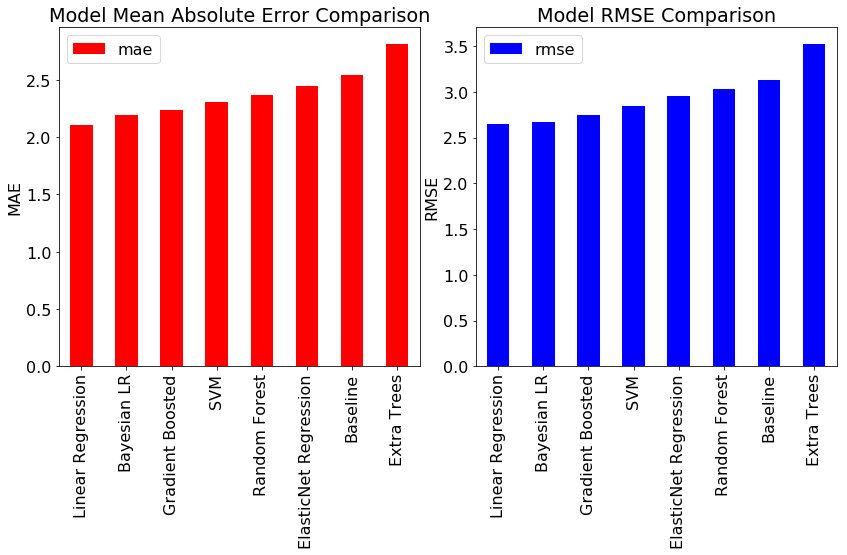

In [129]:
all_model_results = evaluate_trace(trace, X_train, X_test, y_train, y_test, results)

## 8. Summary of All Model Results

In [198]:
all_model_results.sort_values(by=['mae', 'rmse'])

,mae,rmse
Linear Regression,2.10332,2.64849
Bayesian LR,2.19311,2.67085
Gradient Boosted,2.23983,2.75128
SVM,2.3067,2.84669
Random Forest,2.36513,3.03131
ElasticNet Regression,2.45073,2.95719
Baseline,2.54167,3.1336
Extra Trees,2.81787,3.52794


## 9. Model Variable Effects

If we want to see the effect of changing one variable while holding the others constant, we can use the function pm.plot_posterior_predictive_glm. 

This takes a range of values to use for the variable, a linear model, and a number of samples. 

The function evaluates the linear model across the range of values for the number of samples. 

Each time, it draws a different set of parameters from the trace. 

This gives us an indication of the effect of a single variable and also the uncertainty in the model estimates. 

To see the effect of a single variable, we hold the others constant at their median values.

In [199]:
#  Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data

%matplotlib inline
from IPython.core.pylabtools import figsize

def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    figsize(6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Grade', size = 16)
    plt.title("Posterior of Grade vs %s" % query_var, size = 18)
    plt.show()

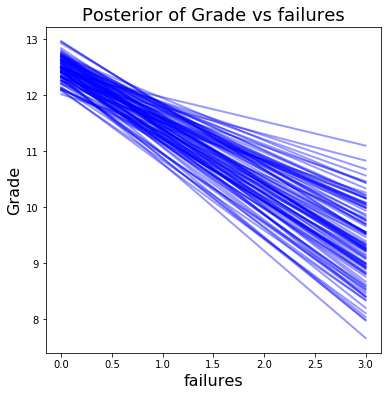

In [200]:
model_effect('failures', trace, X_train)

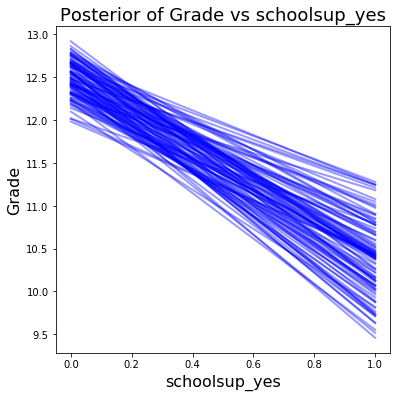

In [201]:
model_effect('schoolsup_yes', trace, X_train)

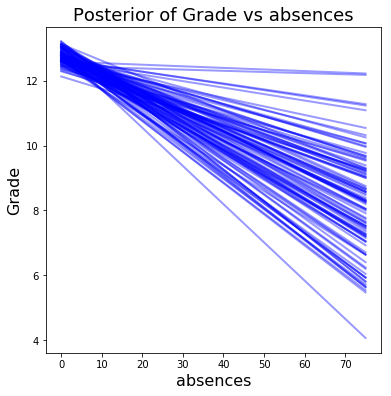

In [202]:
model_effect('absences', trace, X_train)

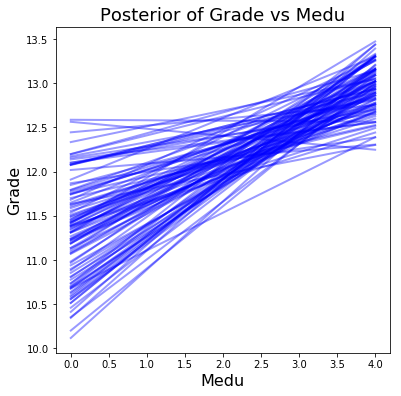

In [203]:
model_effect('Medu', trace, X_train)

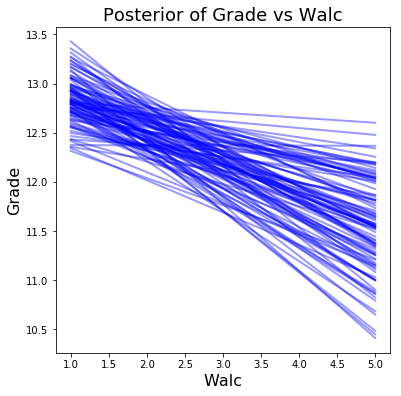

In [204]:
model_effect('Walc', trace, X_train)

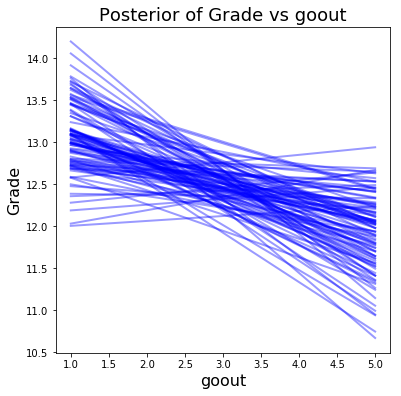

In [205]:
model_effect('goout', trace, X_train)